In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Insurance_Dataset_File.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,male,23.639522,4,yes,northwest,30682.66947
1,46,female,18.709634,3,no,southeast,10308.78897
2,32,female,30.901009,0,yes,southeast,31642.91253
3,60,female,38.737386,3,no,northwest,11180.21208
4,25,male,39.918344,3,yes,southeast,45681.89185


# Q1) What percentage of individuals with BMI above 30 are smokers?

In [4]:
high_bmi_smokers = df[(df['bmi'] > 30) & (df['smoker'] == 'yes')].shape[0]
high_bmi_total = df[df['bmi'] > 30].shape[0]
percentage = (high_bmi_smokers / high_bmi_total) * 100
percentage

44.30936910500943

# Q2) Calculate the percentage of individuals with a BMI above 30 who are smokers. Then, identify individuals whose BMI falls between 25 and 35, and find the median of their charges. Additionally, determine how many individuals in this subset are from the northwest region.

In [ ]:
filtered_df = df[(df['bmi'] >= 25) & (df['bmi'] <= 35)]

median_charges_filtered = filtered_df['charges'].median()

northwest_count = filtered_df[filtered_df['region'] == 'northwest'].shape[0]

median_charges_filtered, northwest_count


# Q3) Filter the dataset to include individuals from the southeast region who have a BMI above 30. Determine the total number of such individuals. Next, calculate the average charges for this group and find the total count of males among them.

In [5]:
filtered_df = df[(df['region'] == 'southeast') & (df['bmi'] > 30)]

total_count = filtered_df.shape[0]

avg_charges_filtered = filtered_df['charges'].mean()

male_count = filtered_df[filtered_df['sex'] == 'male'].shape[0]

total_count, avg_charges_filtered, male_count


(1244, 21998.09621266881, 661)

# Q4) Filter the dataset to include individuals with a BMI above 35 who are non-smokers. Calculate the median charges for this group and then find the proportion of these individuals who live in the southeast region.

In [6]:
filtered_df = df[(df['bmi'] > 35) & (df['smoker'] == 'no')]

median_charges = filtered_df['charges'].median()

southeast_count = filtered_df[filtered_df['region'] == 'southeast'].shape[0]
total_count = filtered_df.shape[0]
southeast_proportion = (southeast_count / total_count) * 100

median_charges, southeast_proportion


(11924.32093, 28.89733840304182)

# Q5) Determine the average insurance charge for individuals in each region. Visualize these averages using a bar chart to compare the insurance charges across different regions.

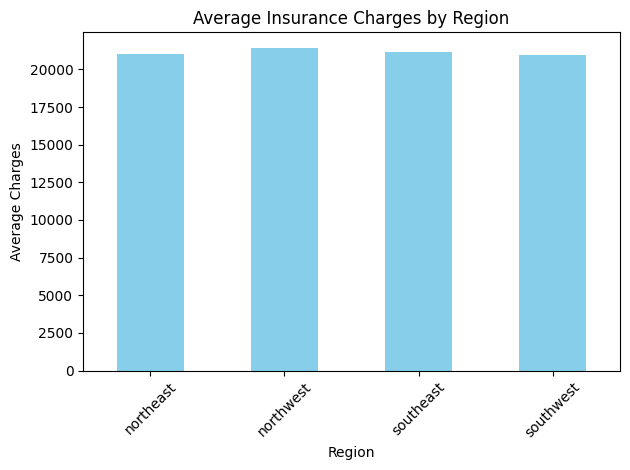

In [7]:
avg_charges_by_region = df.groupby('region')['charges'].mean()

avg_charges_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Q6) Calculate the average insurance charge for each category of the number of children and visualize the results using a bar chart.

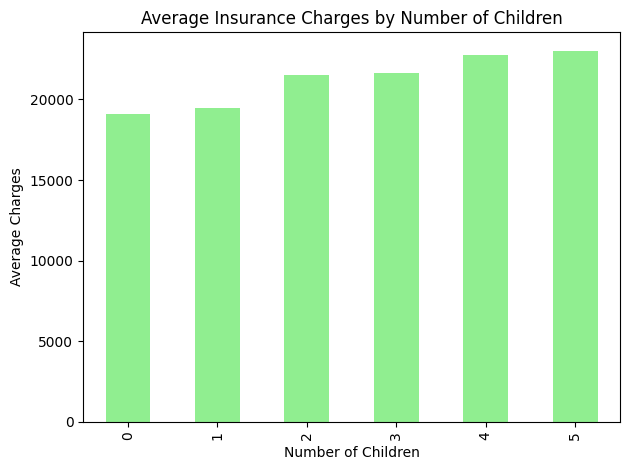

In [11]:
avg_charges_by_children = df.groupby('children')['charges'].mean()

# Bar plot
avg_charges_by_children.plot(kind='bar', color='lightgreen')
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()


# Q7) Show the distribution of insurance charges for smokers and non-smokers. Use histograms with KDE (Kernel Density Estimation) for both groups, and differentiate them using distinct colors.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


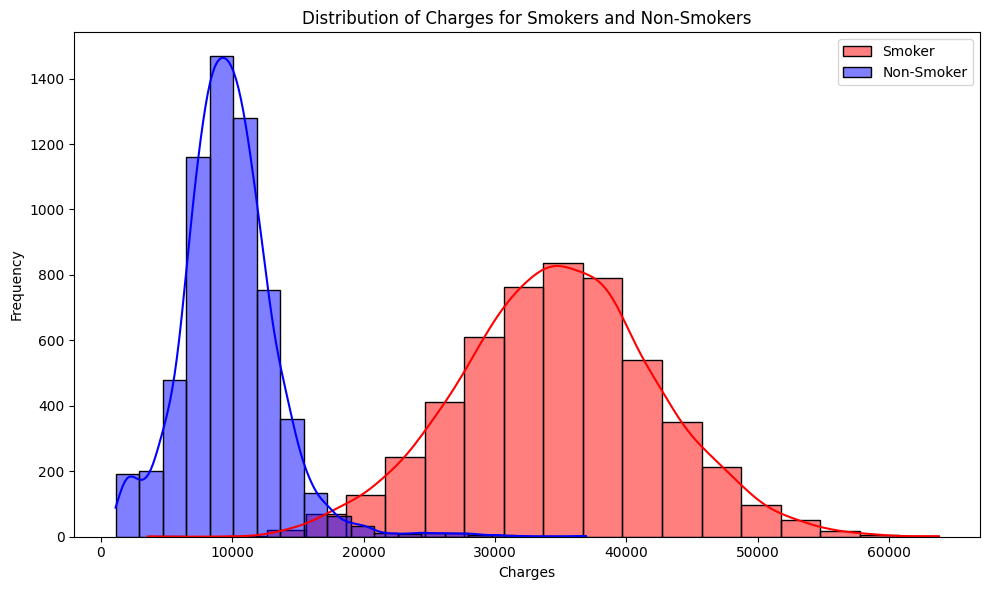

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['smoker'] == 'yes']['charges'], color='red', label='Smoker', kde=True, bins=20)
sns.histplot(df[df['smoker'] == 'no']['charges'], color='blue', label='Non-Smoker', kde=True, bins=20)
plt.legend()
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Q8) What is the impact of BMI on insurance charges for smokers and non-smokers? Plot this using a scatter plot with different colors for smokers and non-smokers.

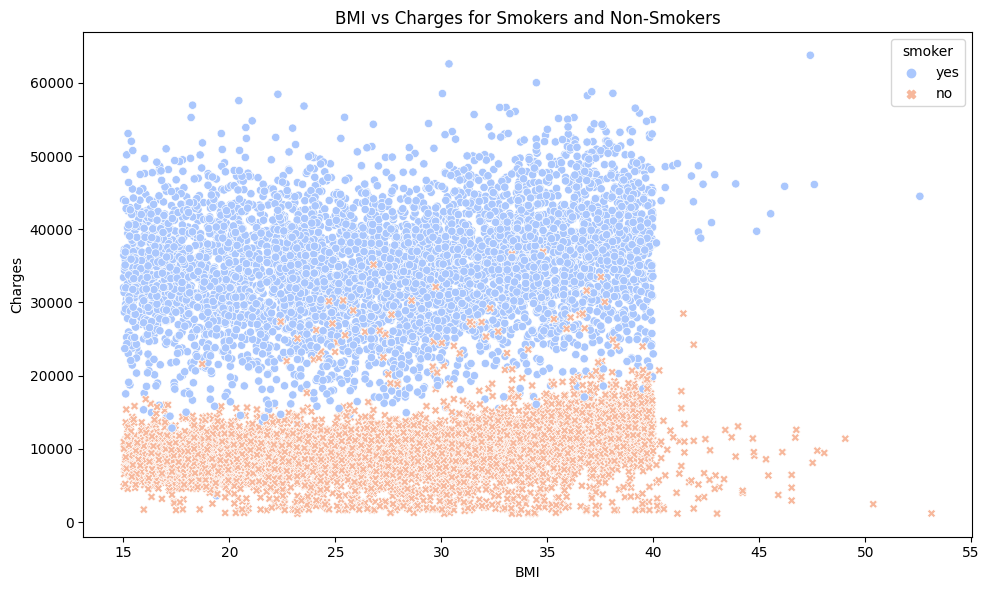

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='coolwarm', style='smoker')
plt.title('BMI vs Charges for Smokers and Non-Smokers')
plt.xlabel('BMI')  
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Q9) Create a new column called age_category by categorizing individuals' ages into the following groups: young_adult for ages 18 to 24, early_adult for ages 25 to 34, mid_adult for ages 35 to 44, late_adult for ages 45 to 54, and senior for ages 55 to 65. Count the number of data points in each age_category and plot a bar chart to visualize the distribution of these categories.

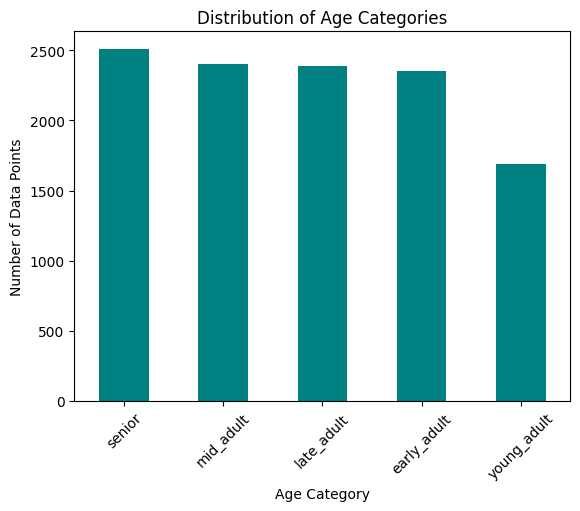

In [16]:
def categorize_age(age):
    if 18 <= age <= 24:
        return 'young_adult'
    elif 25 <= age <= 34:
        return 'early_adult'
    elif 35 <= age <= 44:
        return 'mid_adult'
    elif 45 <= age <= 54:
        return 'late_adult'
    elif 55 <= age <= 65:
        return 'senior'

df['age_category'] = df['age'].apply(categorize_age)

category_counts = df['age_category'].value_counts()

category_counts.plot(kind='bar', color='teal')
plt.xlabel('Age Category')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Age Categories')
plt.xticks(rotation=45)
plt.show()


# Q10) Create a new column called bmi_band to categorize the BMI values into the following bands: Underweight for BMI less than 18.5, Normal for BMI between 18.5 and 25, Pre-obese for BMI between 25 and 30, Obese Class I for BMI between 30 and 35, Obese Class II for BMI between 35 and 40, and Obese Class III for BMI greater than or equal to 40. Count the number of data points in each bmi_band and visualize the counts using a bar chart.

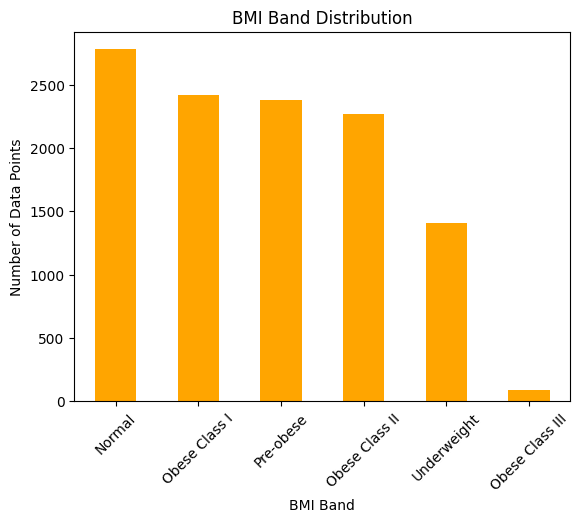

In [17]:
def categorize_bmi_band(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Pre-obese'
    elif 30 <= bmi < 35:
        return 'Obese Class I'
    elif 35 <= bmi < 40:
        return 'Obese Class II'
    elif bmi >= 40:
        return 'Obese Class III'

df['bmi_band'] = df['bmi'].apply(categorize_bmi_band)

band_counts = df['bmi_band'].value_counts()

band_counts.plot(kind='bar', color='orange')
plt.xlabel('BMI Band')
plt.ylabel('Number of Data Points')
plt.title('BMI Band Distribution')
plt.xticks(rotation=45)
plt.show()
